# Housing Price Prediction

Predicts the prices of houses based off of its characteristics (size, location, rooms)

Based off of: https://towardsdatascience.com/house-prices-prediction-using-deep-learning-dea265cc3154

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import data
data = pd.read_csv('kc_house_data.csv')
data.head(5).T

data.info()
data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


### Visualize Housing Prices

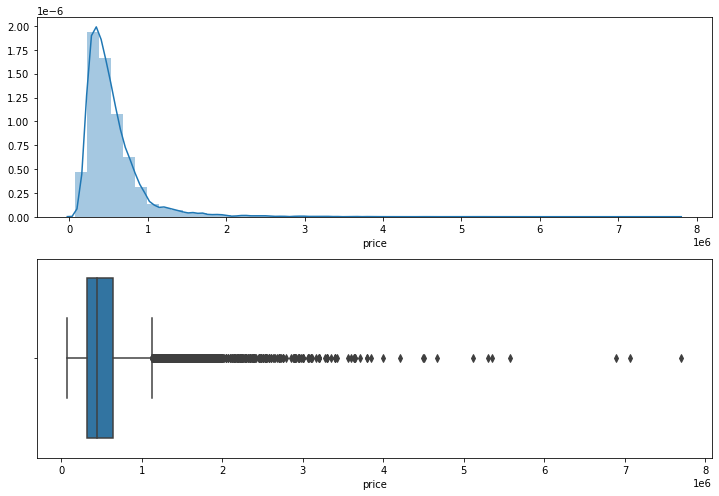

In [3]:
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(2, 1, 1)
sns.distplot(data['price'])
fig.add_subplot(2, 1, 2)
sns.boxplot(data['price'])
plt.tight_layout()

### Visualize square footage

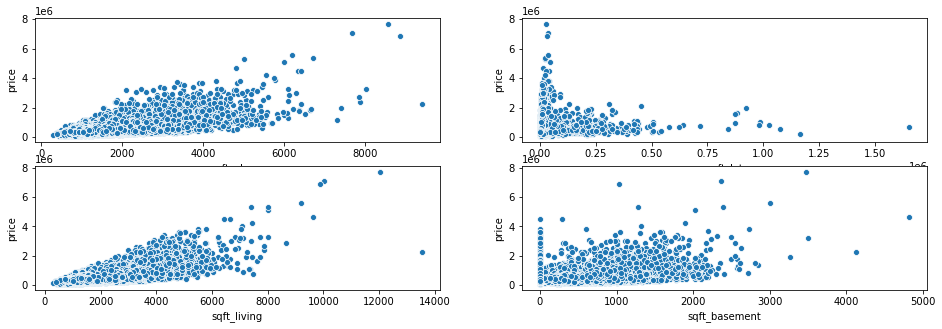

In [4]:
fig = plt.figure(figsize=(16,5))

fig.add_subplot(2, 2, 1)
sns.scatterplot(data['sqft_above'], data['price'])

fig.add_subplot(2,2,2)
sns.scatterplot(data['sqft_lot'],data['price'])

fig.add_subplot(2,2,3)
sns.scatterplot(data['sqft_living'],data['price'])

fig.add_subplot(2,2,4)
sns.scatterplot(data['sqft_basement'],data['price'])

### Visualize bedrooms, bathrooms, floors, grade

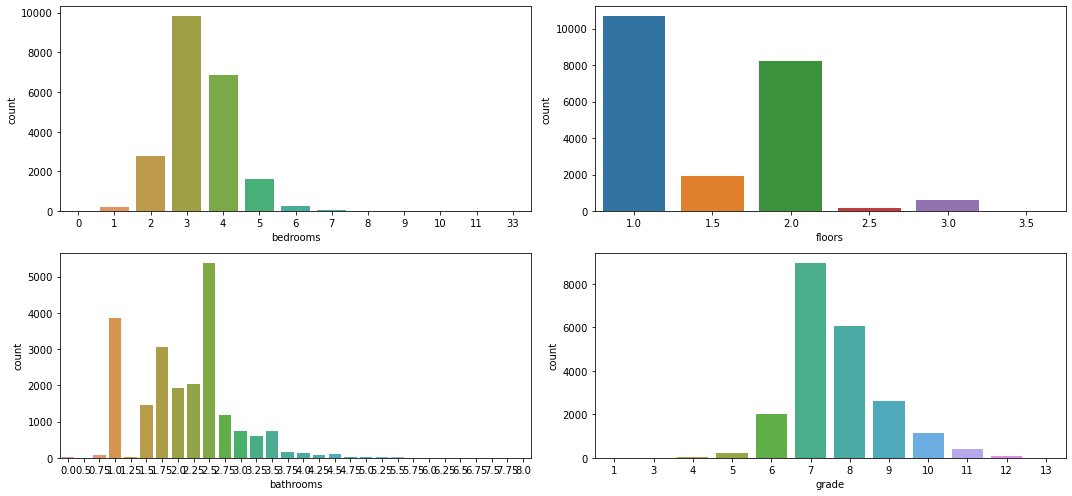

In [5]:
fig = plt.figure(figsize=(15,7))

fig.add_subplot(2,2,1)
sns.countplot(data['bedrooms'])

fig.add_subplot(2,2,2)
sns.countplot(data['floors'])

fig.add_subplot(2,2,3)
sns.countplot(data['bathrooms'])

fig.add_subplot(2,2,4)
sns.countplot(data['grade'])

plt.tight_layout()

### Visualize changes in house prices over time

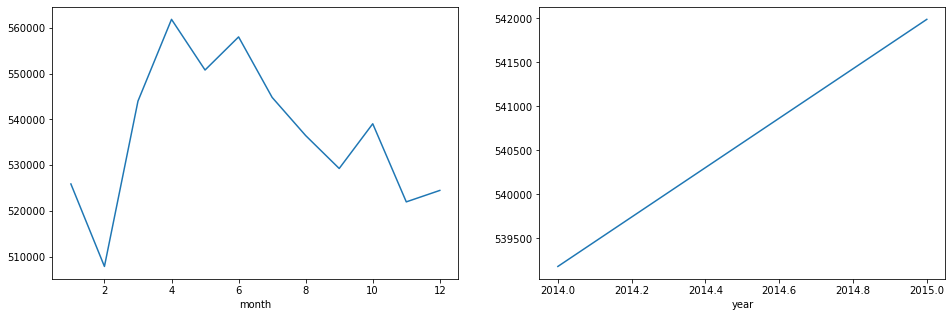

In [6]:
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].apply(lambda date: date.month)
data['year'] = data['date'].apply(lambda date: date.year)

fig = plt.figure(figsize=(16, 5))
fig.add_subplot(1, 2, 1)
data.groupby('month').mean()['price'].plot()

fig.add_subplot(1, 2, 2)
data.groupby('year').mean()['price'].plot()

## Prepare Dataset

In [7]:
# drop unnecessary data
data.isnull().sum()

data = data.drop('date', axis=1)
data = data.drop('id', axis=1)
data = data.drop('zipcode', axis=1)

In [8]:
from sklearn.model_selection import train_test_split

X = data.drop('price', axis=1).values
y = data['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [9]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))

## Model Selection and Evaluation

### Model 1: Multiple Linear Regressions

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# evaluate model
print(regressor.intercept_)  # intercept
print(regressor.coef_)       # slope

# predict test results
y_pred = regressor.predict(X_test)

# results as DataFrame
coeff_df = pd.DataFrame(regressor.coef_, data.drop('price',axis =1).columns, columns=['Coefficient']) 
coeff_df

540148.6694271488
[-3.23385471e+04  2.83116835e+04 -4.56666323e+17  6.37486684e+03
  3.55462144e+03  4.99525388e+04  3.67765620e+04  2.18347478e+04
  1.15981831e+05  4.12963928e+17  2.18967009e+17 -7.28693491e+04
  7.67583451e+03  7.81665489e+04 -1.72703045e+04  1.90466739e+04
 -1.03206563e+04  4.27523517e+03  1.70724462e+04]


,Coefficient
bedrooms,-3.233855e+04
bathrooms,2.831168e+04
sqft_living,-4.566663e+17
sqft_lot,6.374867e+03
floors,3.554621e+03
waterfront,4.995254e+04
view,3.677656e+04
condition,2.183475e+04
grade,1.159818e+05
sqft_above,4.129639e+17


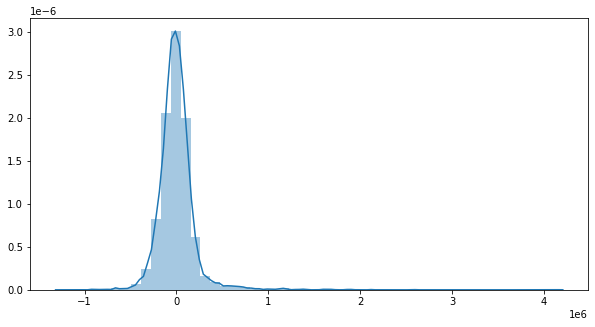

In [11]:
# visualize residuals
fit = plt.figure(figsize=(10, 5))
residuals = (y_test - y_pred)
sns.distplot(residuals)

Normal distribution proves that it has a linear relationship with the dependent variable

In [12]:
# Compare real with predicted values
y_pred = regressor.predict(X_test)
df = pd.DataFrame({ 'Actual': y_test, 'Predicted': y_pred })
df.head(10)

,Actual,Predicted
0,349950.0,530868.669427
1,450000.0,667540.669427
2,635000.0,552756.669427
3,355500.0,345460.669427
4,246950.0,61140.669427
5,406550.0,482356.669427
6,350000.0,312548.669427
7,226500.0,273636.669427
8,265000.0,281204.669427
9,656000.0,534134.669427


In [13]:
# Evaluate performance of model (MAE - MSE - RMSE)
from sklearn import metrics

print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('VarScore: ', metrics.explained_variance_score(y_test, y_pred))

MAE:  125911.6559709978
MSE:  40599802981.57742
RMSE:  201493.9279024989
VarScore:  0.7039878842064917


### Model 2: Keras Regressions

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# Create neural network with 19 neurons for 19 features (4 hidden layers + 1 output layer)
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='Adam', loss='mse')

In [15]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,
          epochs=400)

model.summary()

Epoch 1/400
114/114 [==============================] - 0s 3ms/step - loss: 425256910848.0000 - val_loss: 428744114176.0000
Epoch 2/400
114/114 [==============================] - 0s 2ms/step - loss: 423337558016.0000 - val_loss: 421534334976.0000
Epoch 3/400
114/114 [==============================] - 0s 2ms/step - loss: 394109517824.0000 - val_loss: 352010240000.0000
Epoch 4/400
114/114 [==============================] - 0s 2ms/step - loss: 267052072960.0000 - val_loss: 167410352128.0000
Epoch 5/400
114/114 [==============================] - 0s 1ms/step - loss: 115482730496.0000 - val_loss: 80721436672.0000
Epoch 6/400
114/114 [==============================] - 0s 1ms/step - loss: 76268347392.0000 - val_loss: 64780345344.0000
Epoch 7/400
114/114 [==============================] - 0s 1ms/step - loss: 64656052224.0000 - val_loss: 57737478144.0000
Epoch 8/400
114/114 [==============================] - 0s 1ms/step - loss: 59051593728.0000 - val_loss: 53870272512.0000
Epoch 9/400
114/114 [==

114/114 [==============================] - 0s 1ms/step - loss: 32585009152.0000 - val_loss: 31434778624.0000
Epoch 69/400
114/114 [==============================] - 0s 1ms/step - loss: 32470351872.0000 - val_loss: 31405938688.0000
Epoch 70/400
114/114 [==============================] - 0s 1ms/step - loss: 32435247104.0000 - val_loss: 31421100032.0000
Epoch 71/400
114/114 [==============================] - 0s 1ms/step - loss: 32420870144.0000 - val_loss: 31295066112.0000
Epoch 72/400
114/114 [==============================] - 0s 1ms/step - loss: 32350859264.0000 - val_loss: 31262347264.0000
Epoch 73/400
114/114 [==============================] - 0s 1ms/step - loss: 32281448448.0000 - val_loss: 31267008512.0000
Epoch 74/400
114/114 [==============================] - 0s 1ms/step - loss: 32264976384.0000 - val_loss: 31183548416.0000
Epoch 75/400
114/114 [==============================] - 0s 1ms/step - loss: 32203755520.0000 - val_loss: 31178545152.0000
Epoch 76/400
114/114 [===============

Epoch 135/400
114/114 [==============================] - 0s 1ms/step - loss: 30232272896.0000 - val_loss: 29396088832.0000
Epoch 136/400
114/114 [==============================] - 0s 1ms/step - loss: 30219710464.0000 - val_loss: 29331390464.0000
Epoch 137/400
114/114 [==============================] - 0s 1ms/step - loss: 30175234048.0000 - val_loss: 29320163328.0000
Epoch 138/400
114/114 [==============================] - 0s 1ms/step - loss: 30164512768.0000 - val_loss: 29335623680.0000
Epoch 139/400
114/114 [==============================] - 0s 1ms/step - loss: 30155735040.0000 - val_loss: 29340209152.0000
Epoch 140/400
114/114 [==============================] - 0s 1ms/step - loss: 30116612096.0000 - val_loss: 29260652544.0000
Epoch 141/400
114/114 [==============================] - 0s 1ms/step - loss: 30092910592.0000 - val_loss: 29270093824.0000
Epoch 142/400
114/114 [==============================] - 0s 1ms/step - loss: 30122758144.0000 - val_loss: 29242796032.0000
Epoch 143/400
11

114/114 [==============================] - 0s 1ms/step - loss: 28822112256.0000 - val_loss: 28166912000.0000
Epoch 202/400
114/114 [==============================] - 0s 1ms/step - loss: 28780240896.0000 - val_loss: 28212064256.0000
Epoch 203/400
114/114 [==============================] - 0s 1ms/step - loss: 28765747200.0000 - val_loss: 28238098432.0000
Epoch 204/400
114/114 [==============================] - 0s 1ms/step - loss: 28768911360.0000 - val_loss: 28119506944.0000
Epoch 205/400
114/114 [==============================] - 0s 1ms/step - loss: 28781500416.0000 - val_loss: 28126814208.0000
Epoch 206/400
114/114 [==============================] - 0s 1ms/step - loss: 28729681920.0000 - val_loss: 28110182400.0000
Epoch 207/400
114/114 [==============================] - 0s 1ms/step - loss: 28709091328.0000 - val_loss: 28146718720.0000
Epoch 208/400
114/114 [==============================] - 0s 1ms/step - loss: 28672296960.0000 - val_loss: 28128671744.0000
Epoch 209/400
114/114 [=======

114/114 [==============================] - 0s 1ms/step - loss: 27901001728.0000 - val_loss: 27449452544.0000
Epoch 268/400
114/114 [==============================] - 0s 1ms/step - loss: 27894728704.0000 - val_loss: 27457239040.0000
Epoch 269/400
114/114 [==============================] - 0s 1ms/step - loss: 27857070080.0000 - val_loss: 27497111552.0000
Epoch 270/400
114/114 [==============================] - 0s 1ms/step - loss: 27872858112.0000 - val_loss: 27436810240.0000
Epoch 271/400
114/114 [==============================] - 0s 1ms/step - loss: 27866793984.0000 - val_loss: 27398545408.0000
Epoch 272/400
114/114 [==============================] - 0s 1ms/step - loss: 27900317696.0000 - val_loss: 27397793792.0000
Epoch 273/400
114/114 [==============================] - 0s 1ms/step - loss: 27857827840.0000 - val_loss: 27380764672.0000
Epoch 274/400
114/114 [==============================] - 0s 1ms/step - loss: 27985625088.0000 - val_loss: 27407980544.0000
Epoch 275/400
114/114 [=======

114/114 [==============================] - 0s 1ms/step - loss: 27400030208.0000 - val_loss: 26987558912.0000
Epoch 334/400
114/114 [==============================] - 0s 1ms/step - loss: 27599624192.0000 - val_loss: 26936948736.0000
Epoch 335/400
114/114 [==============================] - 0s 1ms/step - loss: 27345272832.0000 - val_loss: 26931486720.0000
Epoch 336/400
114/114 [==============================] - 0s 1ms/step - loss: 27359313920.0000 - val_loss: 26938591232.0000
Epoch 337/400
114/114 [==============================] - 0s 1ms/step - loss: 27366533120.0000 - val_loss: 26947975168.0000
Epoch 338/400
114/114 [==============================] - 0s 1ms/step - loss: 27321268224.0000 - val_loss: 27206799360.0000
Epoch 339/400
114/114 [==============================] - 0s 1ms/step - loss: 27377473536.0000 - val_loss: 26935795712.0000
Epoch 340/400
114/114 [==============================] - 0s 1ms/step - loss: 27311171584.0000 - val_loss: 27040004096.0000
Epoch 341/400
114/114 [=======

114/114 [==============================] - 0s 1ms/step - loss: 27124740096.0000 - val_loss: 26658125824.0000
Epoch 400/400
114/114 [==============================] - 0s 1ms/step - loss: 26992179200.0000 - val_loss: 26649223168.0000
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 19)                380       
_________________________________________________________________
dense_1 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_2 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_3 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 20        
Total params: 1,540
Tr

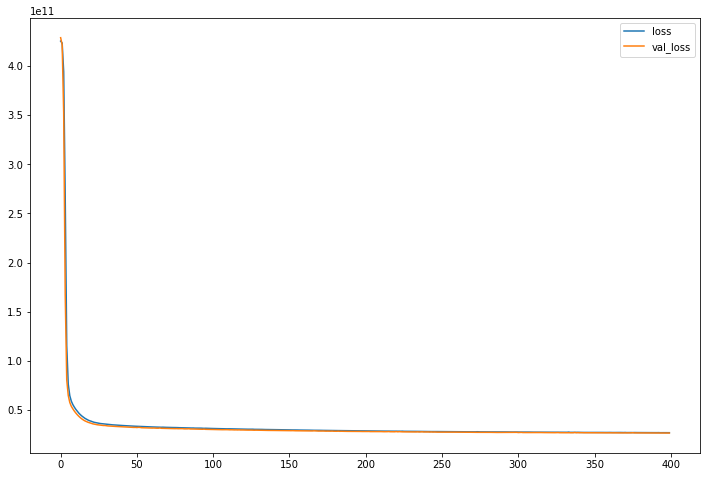

In [16]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12, 8))

MAE: 101485.07153590705
MSE: 26649223777.549927
RMSE: 163245.89972660854
VarScore: 0.8057034074636735


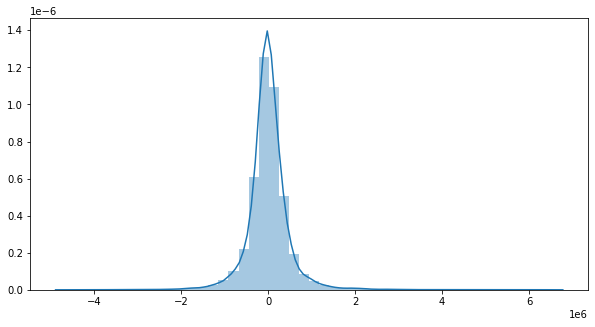

In [17]:
# Evaluate model
y_pred = model.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

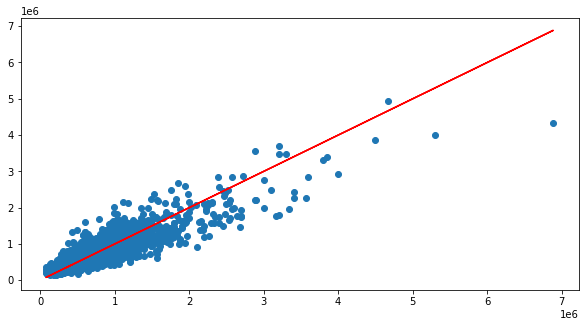

In [18]:
# Visualize predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, 'r')  # diagonal